# Import all relevant packages

In [1]:
#import all 
%matplotlib inline
import matplotlib as mpl
from pandas.io.parsers import read_csv
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc

dpi = 50
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.set_figure_params(dpi=dpi, color_map = 'viridis')

/Users/m.blotenburg/miniconda3/envs/scanpy2/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.8.2 anndata==0.7.8 umap==0.5.2 numpy==1.20.3 scipy==1.7.3 pandas==1.4.1 scikit-learn==0.23.2 statsmodels==0.12.2 pynndescent==0.5.6


# Read in dataframe

In [2]:
df = pd.read_csv('L18_dynamicExp.txt', sep = '\t')
df.head()

,Day,Fluorescence,Replicate,Induction,Sample,Percentage
0,0,Neongreen,d,noninduced,mESC,63.94
1,0,Scarlet,d,noninduced,mESC,0.56
2,0,Negative,d,noninduced,mESC,3.93
3,0,Neongreen,d,noninduced,EB,63.38
4,0,Scarlet,d,noninduced,EB,0.84


In [3]:
df['clone_f'] = df['Replicate'].astype(str) + ', ' + df['Fluorescence'].astype(str)
df.head()

,Day,Fluorescence,Replicate,Induction,Sample,Percentage,clone_f
0,0,Neongreen,d,noninduced,mESC,63.94,"d, Neongreen"
1,0,Scarlet,d,noninduced,mESC,0.56,"d, Scarlet"
2,0,Negative,d,noninduced,mESC,3.93,"d, Negative"
3,0,Neongreen,d,noninduced,EB,63.38,"d, Neongreen"
4,0,Scarlet,d,noninduced,EB,0.84,"d, Scarlet"


# plots

In [4]:
sns.set_style('white')
sns.set_context("talk")

In [5]:
df['days_f'] = df['Day'].astype(str) + '_' + df['Fluorescence'].astype(str)
df.head()

,Day,Fluorescence,Replicate,Induction,Sample,Percentage,clone_f,days_f
0,0,Neongreen,d,noninduced,mESC,63.94,"d, Neongreen",0_Neongreen
1,0,Scarlet,d,noninduced,mESC,0.56,"d, Scarlet",0_Scarlet
2,0,Negative,d,noninduced,mESC,3.93,"d, Negative",0_Negative
3,0,Neongreen,d,noninduced,EB,63.38,"d, Neongreen",0_Neongreen
4,0,Scarlet,d,noninduced,EB,0.84,"d, Scarlet",0_Scarlet


In [6]:
dict1 = {}
for value in df['days_f'].unique():
    dict1[value] = df[df['days_f'] == value]['Percentage'].mean()


In [7]:
df_ind = df[df['Induction'] == 'induced']
df_mesc_ind = df_ind[df_ind['Sample'] == 'mESC']
df_eb_ind = df_ind[df_ind['Sample'] == 'EB']

In [8]:
df_mesc_ind = df_mesc_ind.drop(index=[93,94,95])

In [9]:
df_ni = df[df['Induction'] == 'noninduced']
df_mesc_ni = df_ni[df_ni['Sample'] == 'mESC']
df_eb_ni = df_ni[df_ni['Sample'] == 'EB']

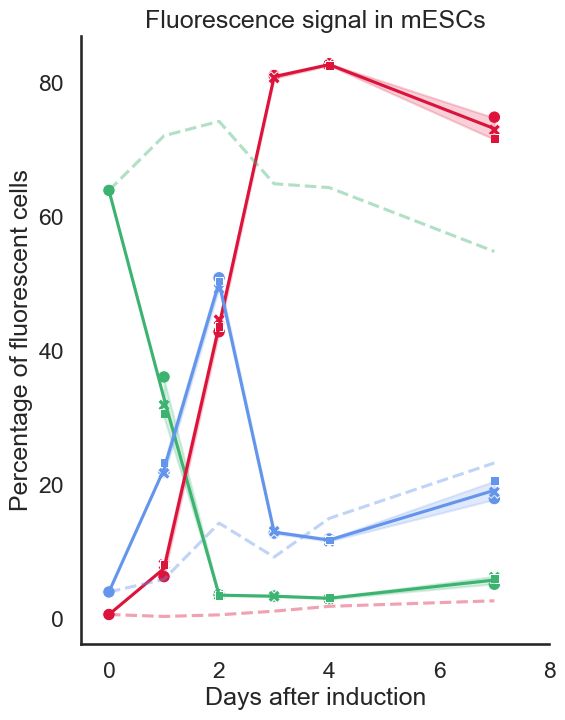

In [10]:
sns.set_context("talk")

fig, ax = plt.subplots(figsize=(6,8), dpi = dpi)

cols = {'Neongreen':'mediumseagreen','Scarlet':'Crimson', 'Negative':'cornflowerblue'}

sns.scatterplot(x = df_mesc_ind['Day'], 
                y = df_mesc_ind['Percentage'], ax=ax, 
                hue = df_mesc_ind['Fluorescence'],
                style = df_mesc_ind['Replicate'], #hue = df['clone_f'],
           palette = cols) # hue_order = ['Neongreen','Scarlet'])
sns.lineplot(x=df_mesc_ind['Day'], 
             y=df_mesc_ind['Percentage'], 
             hue = df_mesc_ind['Fluorescence'], 
             palette = ['mediumseagreen','crimson', 'cornflowerblue'], ci = 'sd')

sns.lineplot(x=df_mesc_ni['Day'], 
             y=df_mesc_ni['Percentage'], 
             hue = df_mesc_ni['Fluorescence'], 
             palette = ['mediumseagreen','crimson', 'cornflowerblue'], ci = 'sd', alpha = 0.4, 
             linestyle = 'dashed')


ax.set_xlim(-0.5,8)
ax.set_ylabel("Percentage of fluorescent cells")
ax.set_xlabel("Days after induction")
ax.set_title("Fluorescence signal in mESCs")
ax.legend([], frameon=False)
#ax.legend(loc = 'upper right')
sns.despine()

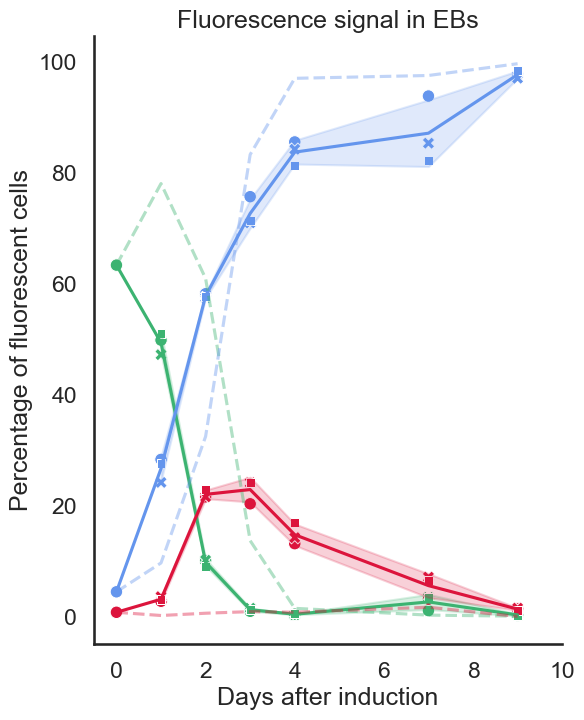

In [11]:
sns.set_context("talk")

fig, ax = plt.subplots(figsize=(6,8), dpi = dpi)

cols = {'Neongreen':'mediumseagreen','Scarlet':'Crimson', 'Negative':'cornflowerblue'}

sns.scatterplot(x = df_eb_ind['Day'], 
                y = df_eb_ind['Percentage'], ax=ax, 
                hue = df_eb_ind['Fluorescence'],
                style = df_eb_ind['Replicate'], #hue = df['clone_f'],
           palette = cols) # hue_order = ['Neongreen','Scarlet'])
sns.lineplot(x=df_eb_ind['Day'], 
             y=df_eb_ind['Percentage'], 
             hue = df_eb_ind['Fluorescence'], 
             palette = ['mediumseagreen','crimson', 'cornflowerblue'], ci = 'sd')

sns.lineplot(x=df_eb_ni['Day'], 
             y=df_eb_ni['Percentage'], 
             hue = df_eb_ni['Fluorescence'], 
             palette = ['mediumseagreen','crimson', 'cornflowerblue'], ci = 'sd', 
             alpha = 0.4, linestyle = 'dashed')


ax.set_xlim(-0.5,10)
ax.set_ylabel("Percentage of fluorescent cells")
ax.set_xlabel("Days after induction")
ax.set_title("Fluorescence signal in EBs")
ax.legend([], frameon=False)

sns.despine()